In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/world_real_estate_data(147k).csv"
df = pd.read_csv(file_path)

#Remove "m²" and convert to numeric (using `str.replace` and `pd.to_numeric`)
df['apartment_total_area'] = pd.to_numeric(df['apartment_total_area'].str.replace(' m²', '', regex=True), errors='coerce')
df['apartment_living_area'] = pd.to_numeric(df['apartment_living_area'].str.replace(' m²', '', regex=True), errors='coerce')

#Fill missing values
df.fillna({
    'building_construction_year': df['building_construction_year'].median(),
    'building_total_floors': df['building_total_floors'].mode()[0],
    'apartment_floor': df['apartment_floor'].mode()[0],
    'apartment_rooms': df['apartment_rooms'].mode()[0],
    'apartment_bedrooms': df['apartment_bedrooms'].median(),
    'apartment_bathrooms': df['apartment_bathrooms'].median()
}, inplace=True)


#Drop rows where price, country, or location are missing
df.dropna(subset=['price_in_USD', 'country', 'location'], inplace=True)

df.info()
df.head()

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 144830 entries, 0 to 147535
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   title                       144830 non-null  object 
 1   country                     144830 non-null  object 
 2   location                    144830 non-null  object 
 3   building_construction_year  144830 non-null  float64
 4   building_total_floors       144830 non-null  float64
 5   apartment_floor             144830 non-null  float64
 6   apartment_rooms             144830 non-null  float64
 7   apartment_bedrooms          144830 non-null  float64
 8   apartment_bathrooms         144830 non-null  float64
 9   apartment_total_area        139162 non-null  float64
 10  apartment_living_area       27002 non-null   float64
 11  price_in_USD                144830 non-null  float64
 12  image                       144830 non-null  object 
 13  url                

In [ ]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        building_construction_year  building_total_floors  apartment_floor  \
count               144830.000000          144830.000000    144830.000000   
mean                  2010.300069               4.528689         2.784706   
std                    105.968164               6.831551         4.095429   
min                      1.000000              -1.000000        -2.000000   
25%                   2021.000000               1.000000         1.000000   
50%                   2021.000000               1.000000         1.000000   
75%                   2021.000000               5.000000         3.000000   
max                   2316.000000             124.000000       202.000000   

       apartment_rooms  apartment_bedrooms  apartment_bathrooms  \
count    144830.000000       144830.000000        144830.000000   
mean          2.289747            2.074308             1.140261   
std           0.981624            9.236189             0.495377   
min          -1.0

In [ ]:
# Average price by country
avg_price_by_country = df.groupby('country')['price_in_USD'].mean().sort_values(ascending=False)
print("\nAverage Price by Country:\n", avg_price_by_country)


Average Price by Country:
 country
Italy              1.631783e+06
UAE                1.308989e+06
United States      1.232923e+06
Portugal           9.649344e+05
Spain              7.388327e+05
Croatia            7.147181e+05
Greece             6.550324e+05
Australia          5.590000e+05
Latvia             5.443125e+05
Montenegro         5.171142e+05
Austria            4.818492e+05
Turkey             3.772402e+05
Poland             3.629315e+05
Indonesia          3.440110e+05
Thailand           2.807266e+05
Czech Republic     2.751573e+05
Finland            2.231320e+05
Armenia            2.102339e+05
Hungary            2.032099e+05
Cyprus             1.955894e+05
Russia             1.924342e+05
Northern Cyprus    1.877211e+05
Lithuania          1.759416e+05
Serbia             1.318079e+05
Uzbekistan         1.127489e+05
Georgia            9.378740e+04
Belarus            7.185711e+04
Name: price_in_USD, dtype: float64


In [ ]:
# Average price per square meter by country
df['price_per_sqm'] = df['price_in_USD'] / df['apartment_total_area']
avg_price_per_sqm = df.groupby('country')['price_per_sqm'].mean().sort_values(ascending=False)
print("\nAverage Price per Square Meter by Country:\n", avg_price_per_sqm)


Average Price per Square Meter by Country:
 country
Italy              13278.612137
Portugal            7842.923071
UAE                 6900.673097
Austria             5734.157877
Spain               5118.757707
Australia           4658.333333
Czech Republic      4519.073942
Montenegro          4151.559967
United States       3828.649627
Poland              3820.043055
Indonesia           3721.193676
Croatia             3552.155113
Thailand            3370.040490
Greece              3321.081080
Latvia              3116.663920
Russia              2984.617126
Turkey              2702.621512
Finland             2696.137887
Northern Cyprus     2490.831075
Serbia              2439.662294
Cyprus              2373.452556
Armenia             2336.680563
Hungary             1985.415718
Lithuania           1909.580476
Uzbekistan          1531.821227
Georgia             1406.915417
Belarus              907.561422
Name: price_per_sqm, dtype: float64


Correlation between property size and price: 0.61


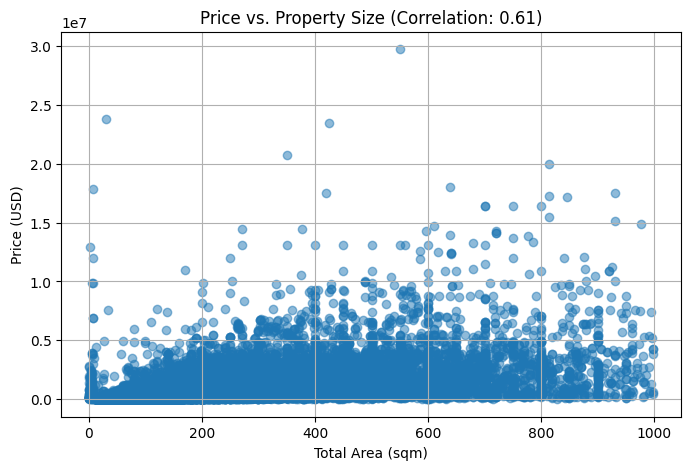

In [ ]:
import matplotlib.pyplot as plt

# Correlation between property size and price
correlation = df['apartment_total_area'].corr(df['price_in_USD'])
print(f"Correlation between property size and price: {correlation:.2f}")

# Scatter plot of price vs. total area
plt.figure(figsize=(8, 5))
plt.scatter(df['apartment_total_area'], df['price_in_USD'], alpha=0.5)
plt.title(f"Price vs. Property Size (Correlation: {correlation:.2f})")
plt.xlabel('Total Area (sqm)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


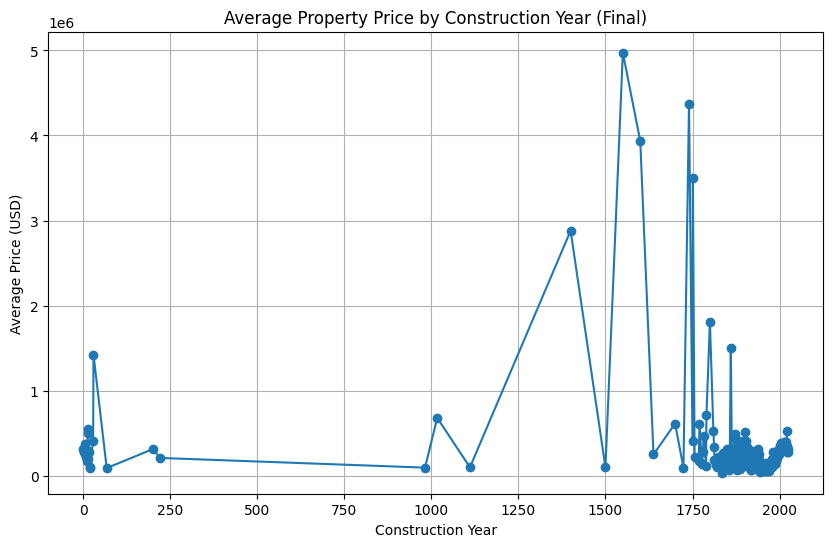

building_construction_year
2015.0    325210.742942
2016.0    392805.378738
2017.0    304834.326039
2018.0    392429.784211
2019.0    321983.667610
2020.0    282226.425604
2021.0    520550.360817
2022.0    351977.518037
2023.0    314614.172544
2024.0    277447.417990
Name: price_in_USD, dtype: float64


In [ ]:
# Remove construction years after 2024
df = df[df['building_construction_year'] <= 2024]

# Re-check average price trend after final cleanup
avg_price_by_year_final = df.groupby('building_construction_year')['price_in_USD'].mean()

# Plot the final cleaned trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year_final.index, avg_price_by_year_final.values, marker='o', linestyle='-')
plt.title('Average Property Price by Construction Year (Final)')
plt.xlabel('Construction Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()

# Show last 10 years for trends
print(avg_price_by_year_final.tail(10))



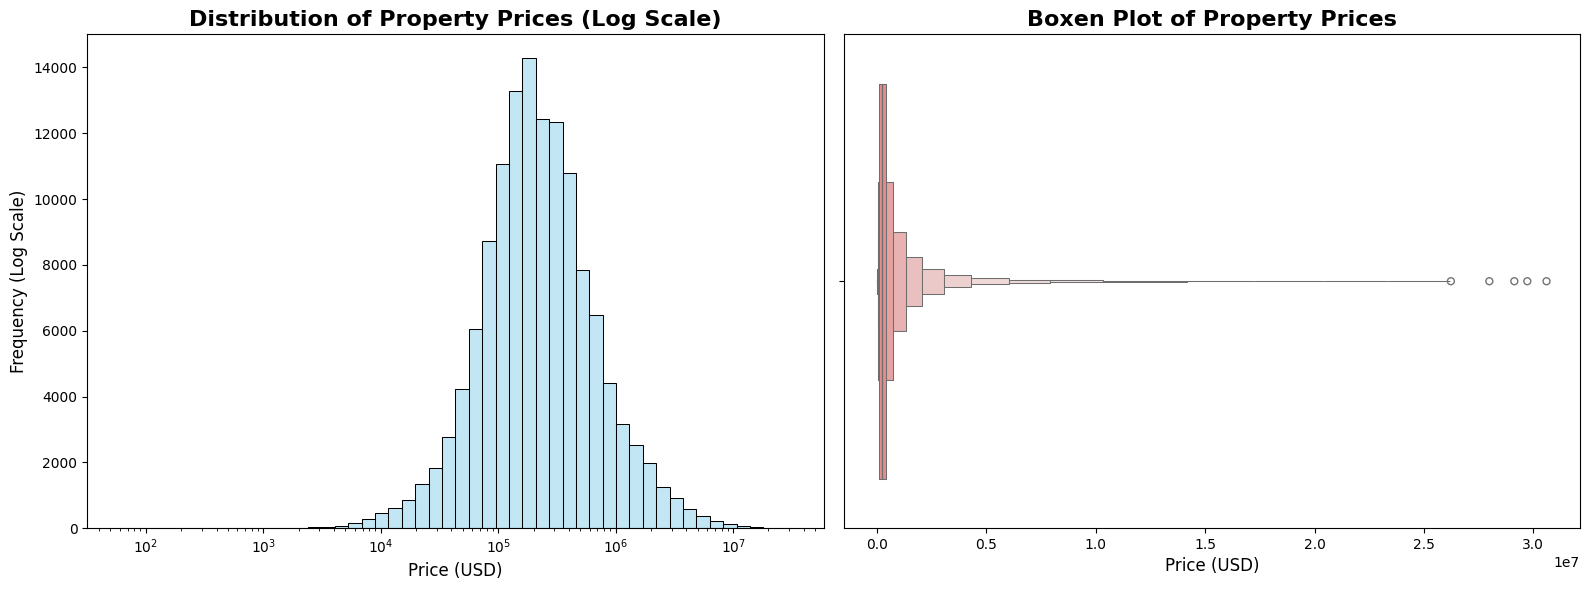

In [ ]:
# Create a 1x2 grid for histogram and boxen plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram with log scale
sns.histplot(df['price_in_USD'], bins=50, kde=True, color='skyblue', edgecolor='black', log_scale=True, ax=axes[0])
axes[0].set_title('Distribution of Property Prices (Log Scale)', fontsize=16, weight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency (Log Scale)', fontsize=12)

# Boxen plot for property prices
sns.boxenplot(x=df['price_in_USD'], color='lightcoral', ax=axes[1])
axes[1].set_title('Boxen Plot of Property Prices', fontsize=16, weight='bold')
axes[1].set_xlabel('Price (USD)', fontsize=12)

plt.tight_layout()
plt.show()




<ipython-input-27-2e9acfffe175>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_country.values, y=avg_price_by_country.index, ax=axes[0], palette='Blues_r')
<ipython-input-27-2e9acfffe175>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_city.values, y=avg_price_by_city.index, ax=axes[1], palette='Oranges_r')
<ipython-input-27-2e9acfffe175>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_sqm_by_country.values, y=avg_price_per_sqm_by_country.index, ax=axes[2], palette='Greens_r')


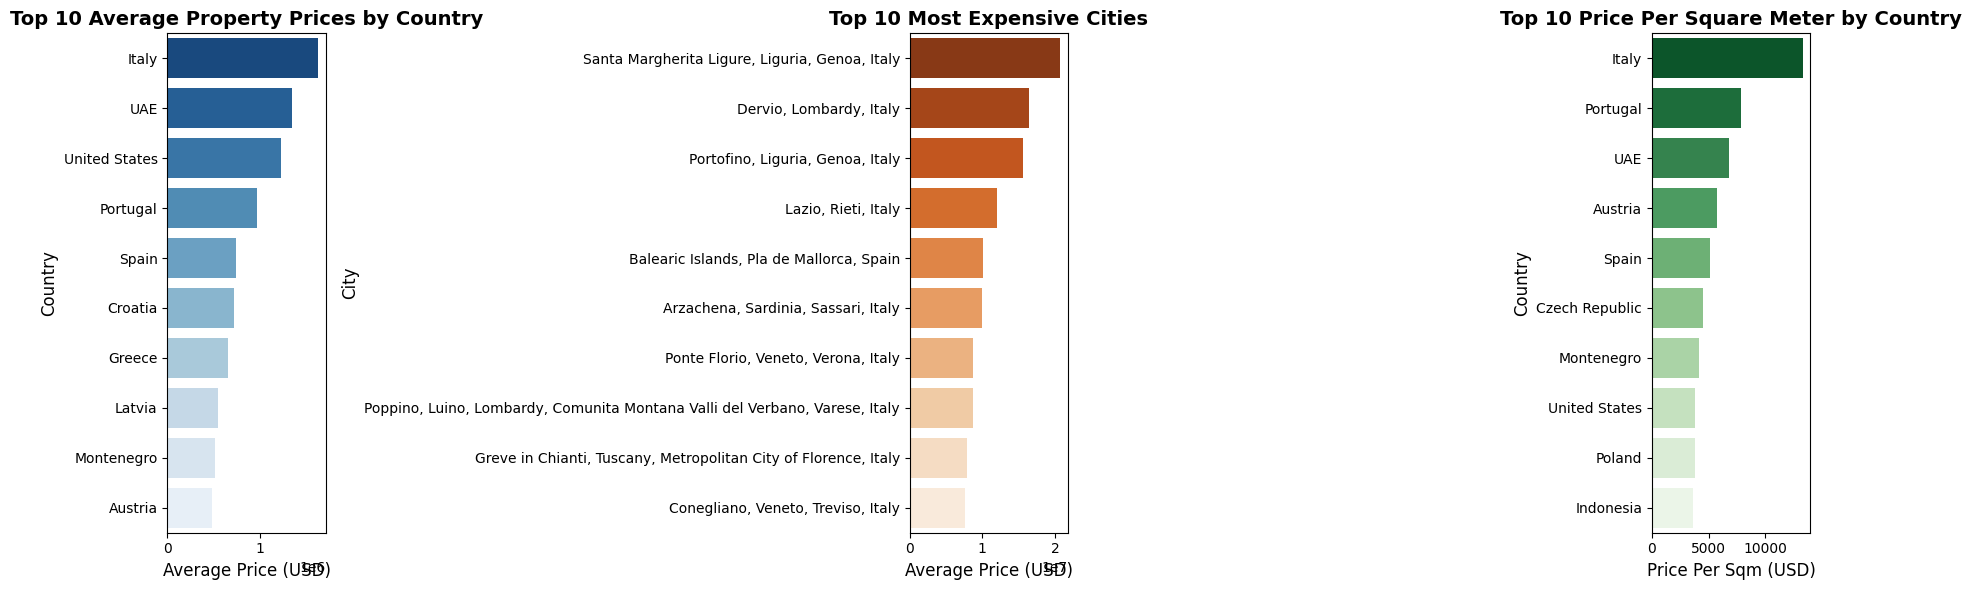

In [ ]:
#Average price by country (top 10)
avg_price_by_country = df.groupby('country')['price_in_USD'].mean().sort_values(ascending=False).head(10)

#Top 10 most expensive cities
avg_price_by_city = df.groupby('location')['price_in_USD'].mean().sort_values(ascending=False).head(10)

# Price per square meter by country (top 10)
avg_price_per_sqm_by_country = (df['price_in_USD'] / df['apartment_total_area'])\
                                .groupby(df['country']).mean().sort_values(ascending=False).head(10)

# Create a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot average price by country
sns.barplot(x=avg_price_by_country.values, y=avg_price_by_country.index, ax=axes[0], palette='Blues_r')
axes[0].set_title('Top 10 Average Property Prices by Country', fontsize=14, weight='bold')
axes[0].set_xlabel('Average Price (USD)', fontsize=12)
axes[0].set_ylabel('Country', fontsize=12)

# Plot average price by city
sns.barplot(x=avg_price_by_city.values, y=avg_price_by_city.index, ax=axes[1], palette='Oranges_r')
axes[1].set_title('Top 10 Most Expensive Cities', fontsize=14, weight='bold')
axes[1].set_xlabel('Average Price (USD)', fontsize=12)
axes[1].set_ylabel('City', fontsize=12)

# Plot price per sqm by country
sns.barplot(x=avg_price_per_sqm_by_country.values, y=avg_price_per_sqm_by_country.index, ax=axes[2], palette='Greens_r')
axes[2].set_title('Top 10 Price Per Square Meter by Country', fontsize=14, weight='bold')
axes[2].set_xlabel('Price Per Sqm (USD)', fontsize=12)
axes[2].set_ylabel('Country', fontsize=12)

plt.tight_layout()
plt.show()


<ipython-input-29-a834e2a22586>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['apartment_rooms_capped'] = df_cleaned['apartment_rooms'].apply(lambda x: 10 if x > 10 else x)
<ipython-input-29-a834e2a22586>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['apartment_bathrooms_capped'] = df_cleaned['apartment_bathrooms'].apply(lambda x: 10 if x > 10 else x)
<ipython-input-29-a834e2a22586>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

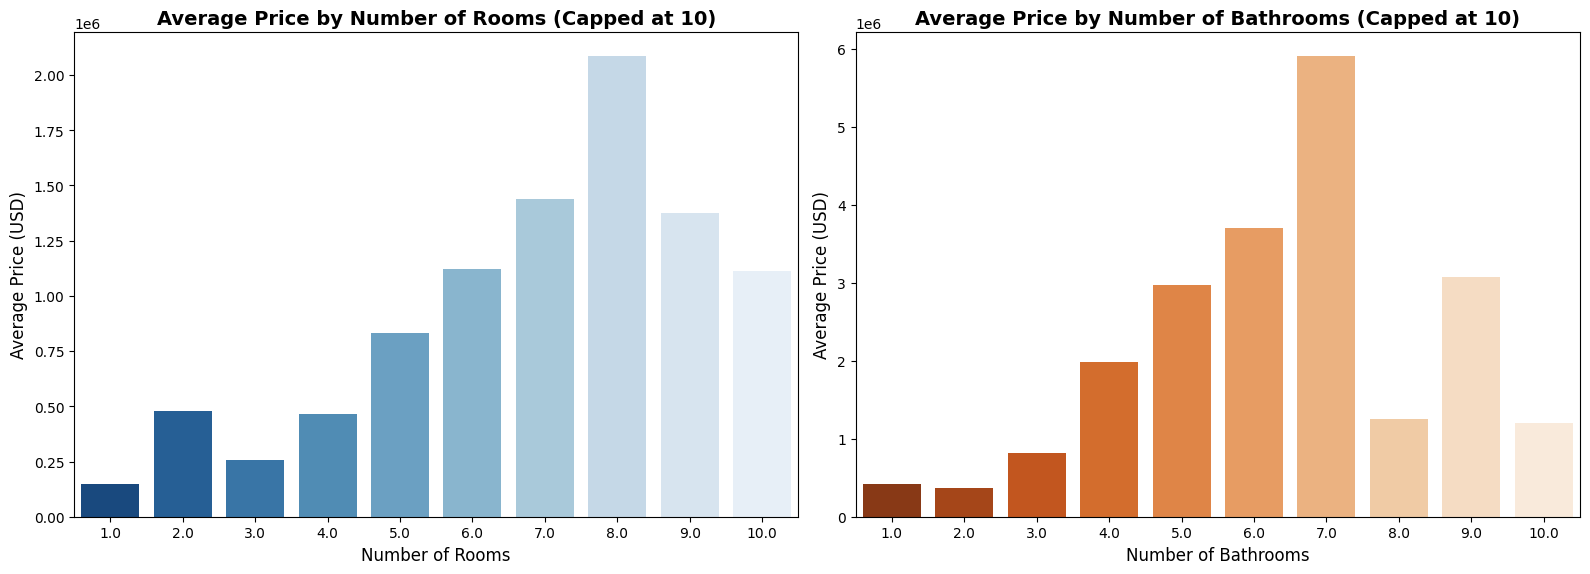

In [ ]:
# Remove invalid values (-1) for rooms and bathrooms
df_cleaned = df[(df['apartment_rooms'] >= 0) & (df['apartment_bathrooms'] >= 0)]

# Cap number of rooms and bathrooms at 10
df_cleaned['apartment_rooms_capped'] = df_cleaned['apartment_rooms'].apply(lambda x: 10 if x > 10 else x)
df_cleaned['apartment_bathrooms_capped'] = df_cleaned['apartment_bathrooms'].apply(lambda x: 10 if x > 10 else x)

# Average price by capped room and bathroom counts
avg_price_by_rooms_capped = df_cleaned.groupby('apartment_rooms_capped')['price_in_USD'].mean()
avg_price_by_bathrooms_capped = df_cleaned.groupby('apartment_bathrooms_capped')['price_in_USD'].mean()

# Create a 1x2 grid for cleaner plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot average price by number of rooms (capped at 10)
sns.barplot(x=avg_price_by_rooms_capped.index, y=avg_price_by_rooms_capped.values, ax=axes[0], palette='Blues_r')
axes[0].set_title('Average Price by Number of Rooms (Capped at 10)', fontsize=14, weight='bold')
axes[0].set_xlabel('Number of Rooms', fontsize=12)
axes[0].set_ylabel('Average Price (USD)', fontsize=12)

# Plot average price by number of bathrooms (capped at 10)
sns.barplot(x=avg_price_by_bathrooms_capped.index, y=avg_price_by_bathrooms_capped.values, ax=axes[1], palette='Oranges_r')
axes[1].set_title('Average Price by Number of Bathrooms (Capped at 10)', fontsize=14, weight='bold')
axes[1].set_xlabel('Number of Bathrooms', fontsize=12)
axes[1].set_ylabel('Average Price (USD)', fontsize=12)

plt.tight_layout()
plt.show()




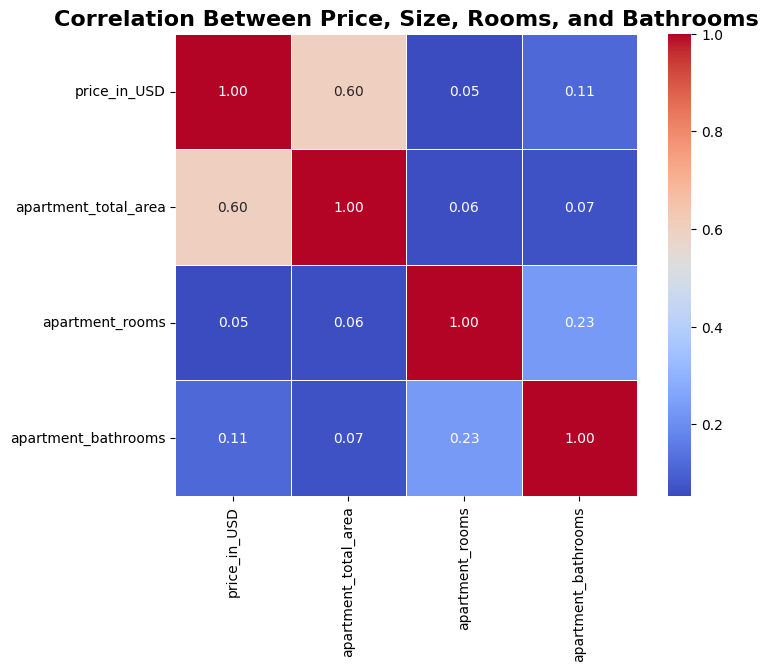

In [ ]:

# Select relevant numerical columns for correlation
correlation_data = df[['price_in_USD', 'apartment_total_area', 'apartment_rooms', 'apartment_bathrooms']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Between Price, Size, Rooms, and Bathrooms', fontsize=16, weight='bold')
plt.show()


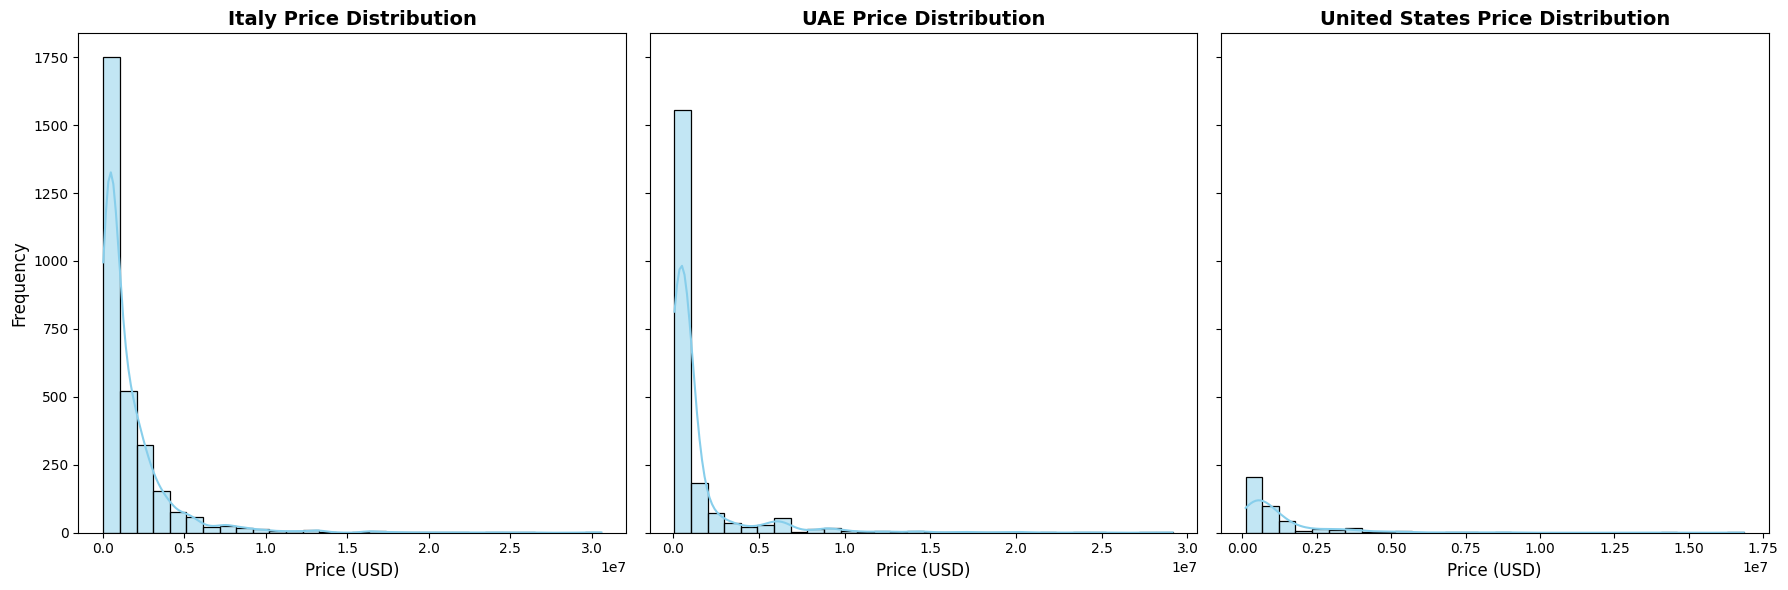

In [ ]:
# Select top 3 countries based on average price
top_countries = avg_price_by_country.index[:3]
top_countries_data = df_cleaned[df_cleaned['country'].isin(top_countries)]

# Create a 1x3 grid for better comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot price distribution for each top country
for i, country in enumerate(top_countries):
    sns.histplot(top_countries_data[top_countries_data['country'] == country]['price_in_USD'],
                 bins=30, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'{country} Price Distribution', fontsize=14, weight='bold')
    axes[i].set_xlabel('Price (USD)', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Adjust spacing
plt.tight_layout()
plt.show()


<ipython-input-33-5baf934c6dc4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_city_thailand.values, y=avg_price_by_city_thailand.index, palette='Oranges_r')


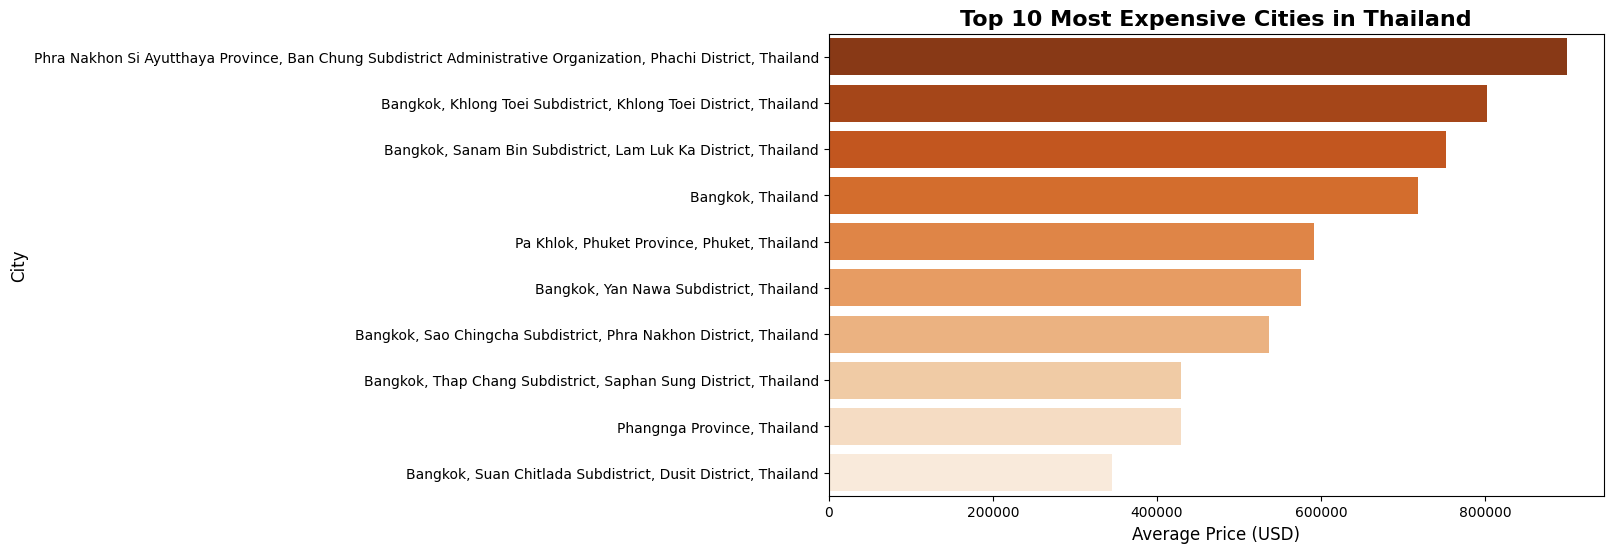

In [ ]:
# Filter data for Thailand
thailand_data = df_cleaned[df_cleaned['country'] == 'Thailand']

# Average price by city in Thailand (top 10)
avg_price_by_city_thailand = thailand_data.groupby('location')['price_in_USD'].mean().sort_values(ascending=False).head(10)

# Create bar plot for average price by city in Thailand
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_city_thailand.values, y=avg_price_by_city_thailand.index, palette='Oranges_r')
plt.title('Top 10 Most Expensive Cities in Thailand', fontsize=16, weight='bold')
plt.xlabel('Average Price (USD)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()


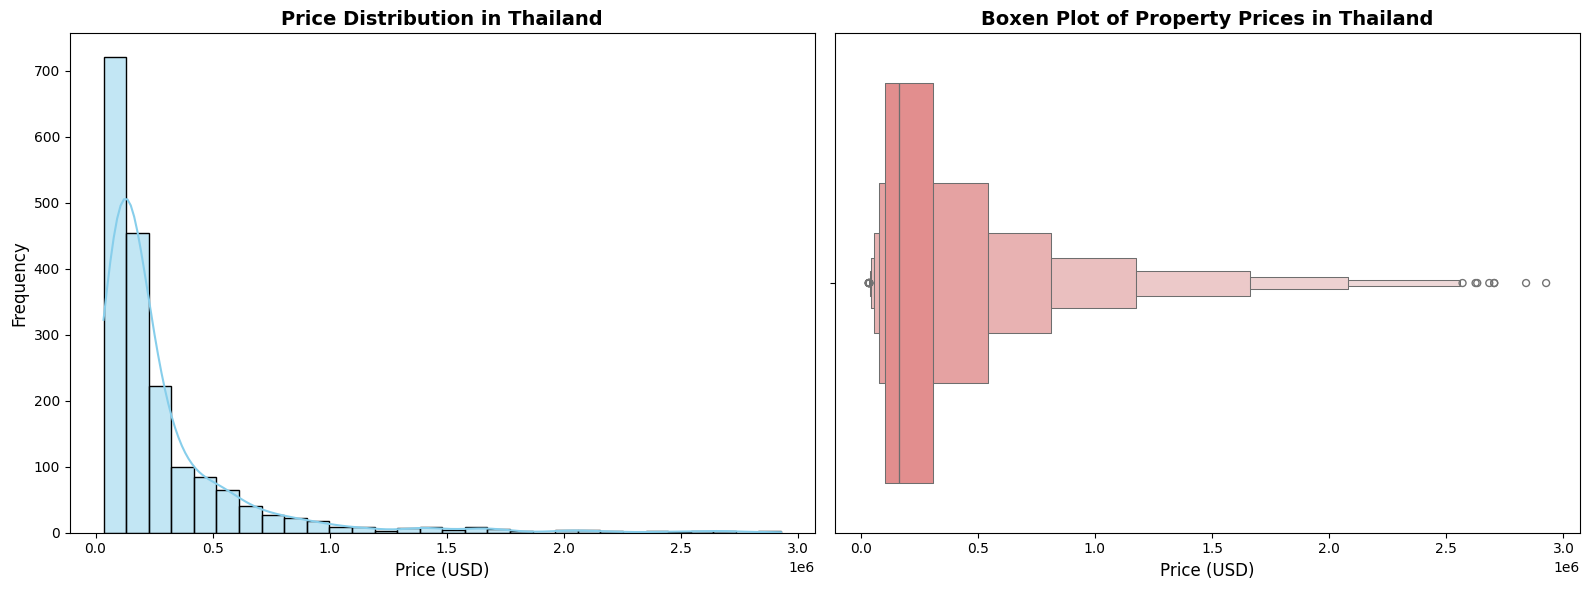

In [ ]:
# Create a 1x2 grid for histogram and boxen plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of property prices in Thailand
sns.histplot(thailand_data['price_in_USD'], bins=30, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Price Distribution in Thailand', fontsize=14, weight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Boxen plot for price distribution in Thailand
sns.boxenplot(x=thailand_data['price_in_USD'], color='lightcoral', ax=axes[1])
axes[1].set_title('Boxen Plot of Property Prices in Thailand', fontsize=14, weight='bold')
axes[1].set_xlabel('Price (USD)', fontsize=12)

plt.tight_layout()
plt.show()



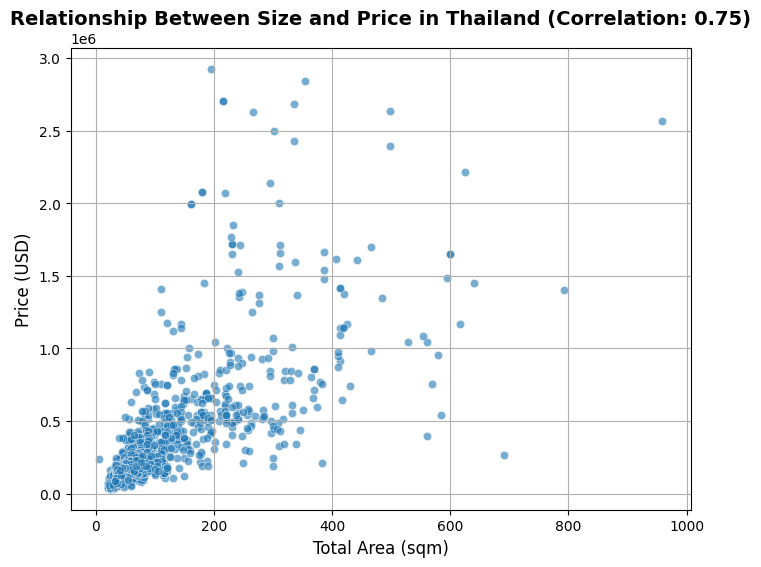

In [ ]:
# Correlation between size and price in Thailand
correlation_size_price_thailand = thailand_data['apartment_total_area'].corr(thailand_data['price_in_USD'])

# Scatter plot of size vs price in Thailand
plt.figure(figsize=(8, 6))
sns.scatterplot(x=thailand_data['apartment_total_area'], y=thailand_data['price_in_USD'], alpha=0.6)
plt.title(f'Relationship Between Size and Price in Thailand (Correlation: {correlation_size_price_thailand:.2f})', fontsize=14, weight='bold')
plt.xlabel('Total Area (sqm)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)
plt.show()


<ipython-input-36-f648f5bdeab3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison_countries.loc[['Avg Price (Thailand)', 'Avg Price (Italy)', 'Avg Price (UAE)']].index,


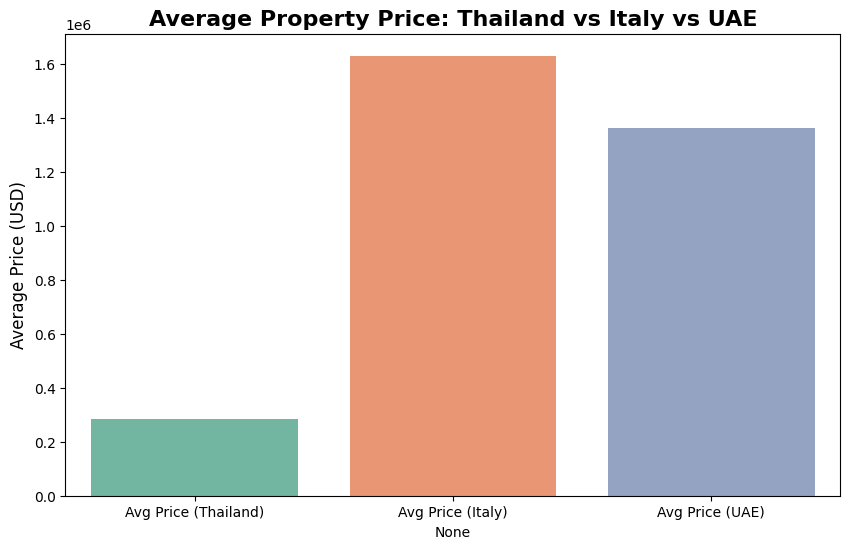

In [ ]:
# Filter data for Italy and UAE
italy_data = df_cleaned[df_cleaned['country'] == 'Italy']
uae_data = df_cleaned[df_cleaned['country'] == 'UAE']

# Create a comparison table for Thailand, Italy, and UAE
comparison_countries = pd.DataFrame({
    'Avg Price (Thailand)': thailand_data['price_in_USD'].mean(),
    'Avg Price (Italy)': italy_data['price_in_USD'].mean(),
    'Avg Price (UAE)': uae_data['price_in_USD'].mean(),
    'Avg Size (Thailand)': thailand_data['apartment_total_area'].mean(),
    'Avg Size (Italy)': italy_data['apartment_total_area'].mean(),
    'Avg Size (UAE)': uae_data['apartment_total_area'].mean(),
    'Price Per Sqm (Thailand)': (thailand_data['price_in_USD'] / thailand_data['apartment_total_area']).mean(),
    'Price Per Sqm (Italy)': (italy_data['price_in_USD'] / italy_data['apartment_total_area']).mean(),
    'Price Per Sqm (UAE)': (uae_data['price_in_USD'] / uae_data['apartment_total_area']).mean()
}, index=['Value']).T

# reate a bar plot to compare average price across the three countries
plt.figure(figsize=(10, 6))
sns.barplot(x=comparison_countries.loc[['Avg Price (Thailand)', 'Avg Price (Italy)', 'Avg Price (UAE)']].index,
            y=comparison_countries.loc[['Avg Price (Thailand)', 'Avg Price (Italy)', 'Avg Price (UAE)']]['Value'],
            palette='Set2')
plt.title('Average Property Price: Thailand vs Italy vs UAE', fontsize=16, weight='bold')
plt.ylabel('Average Price (USD)', fontsize=12)
plt.show()
